In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Librerías para trabajar con fechas
# -----------------------------------------------------------------------
from datetime import datetime

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames
#pd.set_option('display.max_rows', None) # para poder visualizar todas las filas de los DataFrames

In [2]:
df = pd.read_csv('../data/bookings_clean_ok.csv', index_col=0)

In [3]:
df["is_canceled"].sample(5)

10664        Cancelado
61165        Cancelado
113947    No Cancelado
82751        Cancelado
71504        Cancelado
Name: is_canceled, dtype: object

In [4]:
df_cancelados=  df[df["is_canceled"]== "Cancelado"]

In [5]:
df_cancelados["is_canceled"].count()

43122

In [6]:
#tasa cancelacion

tasa_cancelacion= df_cancelados["is_canceled"].count()/df["is_canceled"].count()

In [7]:
tasa_cancelacion*100

35.98417837711539

In [8]:
df.columns

Index(['hotel', 'is_canceled', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month', 'adults',
       'children', 'babies', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'agent', 'company',
       'days_in_waiting_list', 'customer_type', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status', 'change_room', 'adr',
       'lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
       'total_nights'],
      dtype='object')

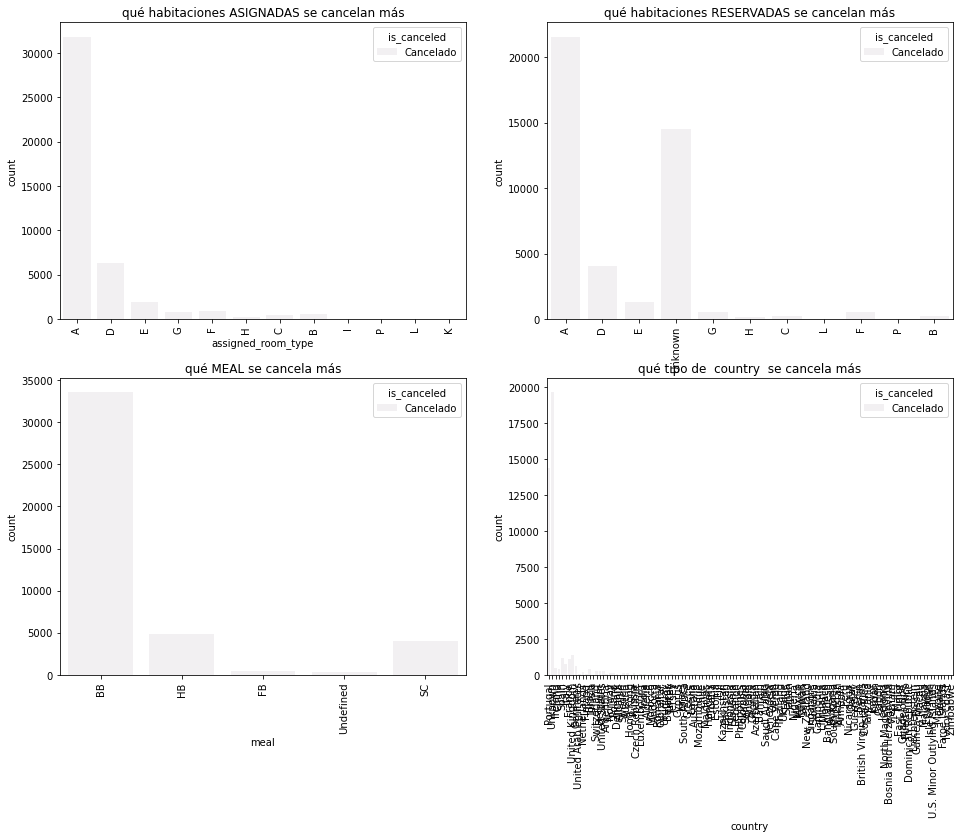

In [9]:
# cancelaciones por reserva
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
sns.countplot(x='assigned_room_type', hue='is_canceled', data=df_cancelados, color="violet", ax=axes[0, 0])
axes[0, 0].set_title('qué habitaciones ASIGNADAS se cancelan más')
axes[0, 0].tick_params(axis='x', rotation=90)
sns.countplot(x='reserved_room_type', hue='is_canceled', data=df_cancelados, color="violet", ax=axes[0, 1])
axes[0, 1].set_title('qué habitaciones RESERVADAS se cancelan más')
axes[0, 1].tick_params(axis='x', rotation=90)
sns.countplot(x='meal', hue='is_canceled', data=df_cancelados, color="violet", ax=axes[1,0])
axes[1,0].set_title('qué MEAL se cancela más')
axes[1,0].tick_params(axis='x', rotation=90)
sns.countplot(x='country', hue='is_canceled', data=df_cancelados, color="violet", ax=axes[1,1])
axes[1,1].set_title('qué tipo de  country  se cancela más')
axes[1,1].tick_params(axis='x', rotation=90)


<AxesSubplot:xlabel='total_nights', ylabel='Count'>

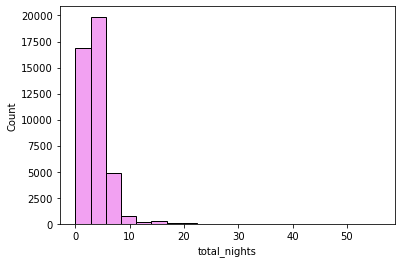

In [10]:
sns.histplot(x='total_nights', data=df_cancelados, bins = 20,color="violet")
#'Distribución cancelaciones por noche reservada'

<AxesSubplot:xlabel='adr', ylabel='Count'>

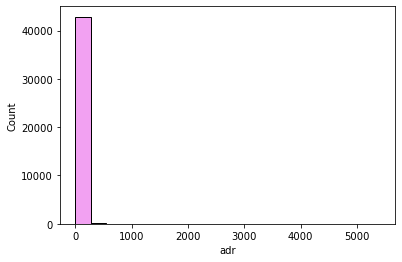

In [11]:
sns.histplot(x='adr', data=df_cancelados, bins = 20,color="violet")
#'Distribución cancelaciones por PRECIO reservada'

<AxesSubplot:xlabel='adr', ylabel='total_nights'>

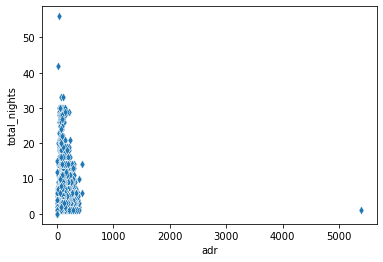

In [12]:
sns.scatterplot(y = 'total_nights', 
            x = "adr", 
            data = df_cancelados, 
            marker = "d", 
       
            )

<AxesSubplot:xlabel='required_car_parking_spaces', ylabel='count'>

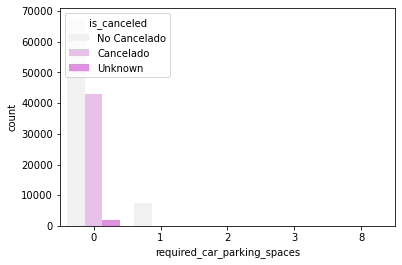

In [13]:
sns.countplot(x='required_car_parking_spaces', hue='is_canceled', data=df, color="violet")
#'Distribución cancelaciones por Parking reservada'


<AxesSubplot:xlabel='required_car_parking_spaces', ylabel='count'>

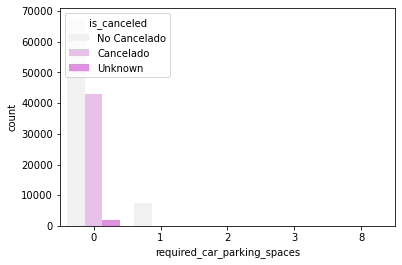

In [14]:
sns.countplot(x='required_car_parking_spaces', hue='is_canceled', data=df, color="violet")
#'Distribución cancelaciones por Parking reservada'

In [15]:
df.columns

Index(['hotel', 'is_canceled', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month', 'adults',
       'children', 'babies', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'agent', 'company',
       'days_in_waiting_list', 'customer_type', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status', 'change_room', 'adr',
       'lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
       'total_nights'],
      dtype='object')

In [16]:
list_numericas =['arrival_date_year',]

In [17]:
numericas = df.select_dtypes(include = np.number).columns

In [18]:
len(numericas)

17

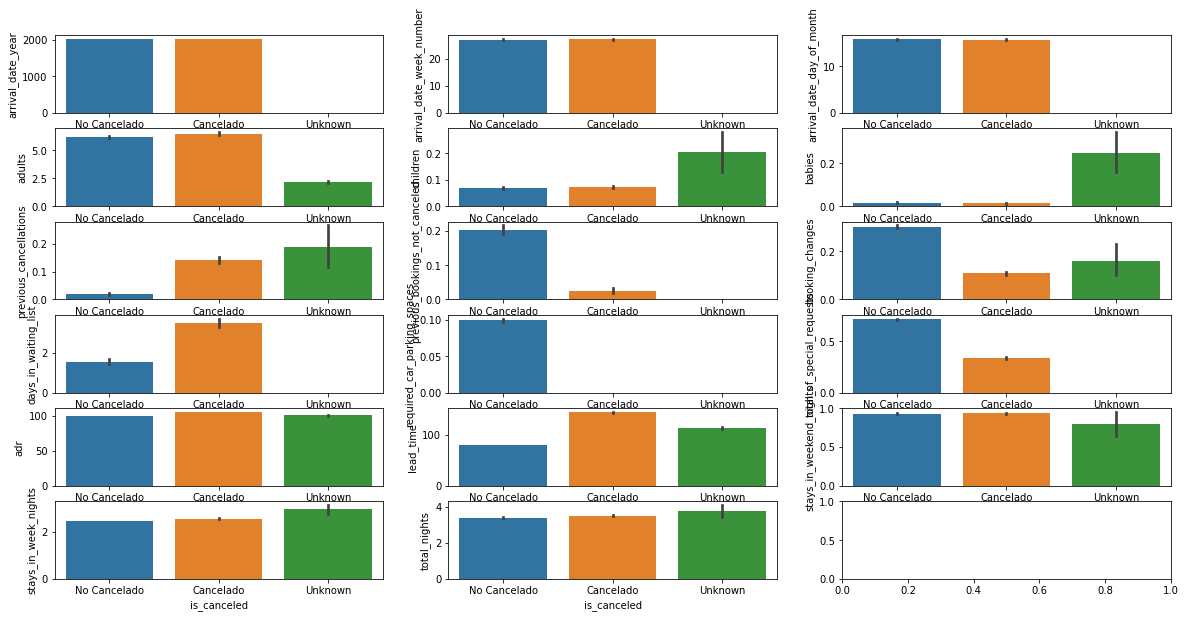

In [19]:
fig, axes = plt.subplots(nrows = 6, ncols = 3, figsize = (20,10)) 

axes = axes.flat #aplanar los indices (solo un indice)

for indice, col in enumerate(numericas):

    sns.barplot(x = "is_canceled", 
            y = col, 
            data = df, 
            ax = axes[indice]
            )

In [20]:
df.columns

Index(['hotel', 'is_canceled', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month', 'adults',
       'children', 'babies', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'agent', 'company',
       'days_in_waiting_list', 'customer_type', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status', 'change_room', 'adr',
       'lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
       'total_nights'],
      dtype='object')

<AxesSubplot:xlabel='booking_changes', ylabel='count'>

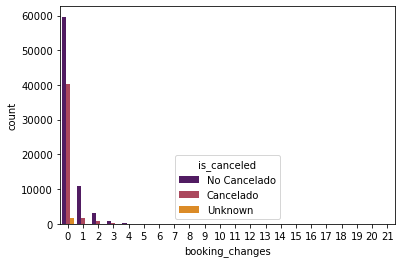

In [21]:
sns.countplot(x= 'booking_changes', hue='is_canceled', data=df, palette="inferno")
#'Distribución cancelaciones por booking changes'

<AxesSubplot:xlabel='stays_in_week_nights', ylabel='count'>

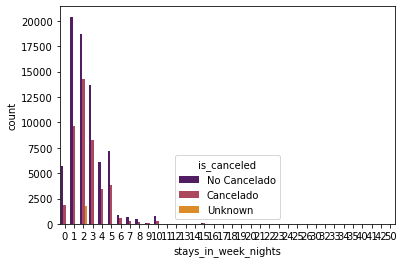

In [22]:
sns.countplot(x= 'stays_in_week_nights', hue='is_canceled', data=df, palette="inferno")
#'Distribución cancelaciones por stays_in_week_nights'

<AxesSubplot:xlabel='stays_in_weekend_nights', ylabel='count'>

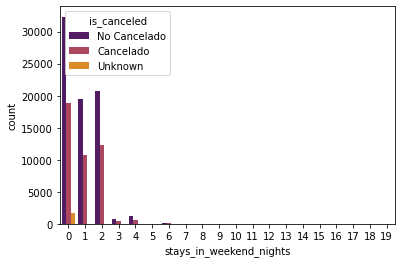

In [23]:
sns.countplot(x= 'stays_in_weekend_nights', hue='is_canceled', data=df, palette="inferno")
#'Distribución cancelaciones por stays_in_weekend_nights'

<AxesSubplot:xlabel='arrival_date_month', ylabel='count'>

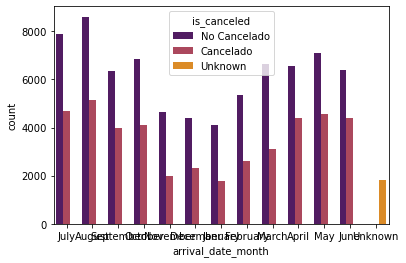

In [24]:
sns.countplot(x= 'arrival_date_month', hue='is_canceled', data=df, palette="inferno")
#'Distribución cancelaciones por arrival_date_month'

In [25]:
df_id = df.reset_index()

In [26]:
df_id

,index,hotel,is_canceled,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,company,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,reservation_status,change_room,adr,lead_time,stays_in_weekend_nights,stays_in_week_nights,total_nights
0,0,Resort Hotel,No Cancelado,2015.0,July,27.0,1.0,2,0,0,BB,Portugal,Unknown,Direct,First time,0,0,C,C,3,Unknown,Unknown,0,Transient,0,0,Check-Out,equal,0.000,342,0,0,0
1,1,Resort Hotel,No Cancelado,2015.0,July,27.0,1.0,2,0,0,BB,Unknown,Unknown,Direct,First time,0,0,Unknown,C,4,Unknown,Unknown,0,Transient,0,0,Check-Out,change,0.000,737,0,0,0
2,2,Resort Hotel,No Cancelado,2015.0,July,27.0,1.0,1,0,0,BB,United Kingdom,Unknown,Direct,First time,0,0,A,C,0,Unknown,Unknown,0,Transient,0,0,Check-Out,change,75.000,7,0,1,1
3,3,Resort Hotel,No Cancelado,2015.0,July,27.0,1.0,1,0,0,BB,United Kingdom,Corporate,Corporate,First time,0,0,A,A,0,304.0,Unknown,0,Transient,0,0,Check-Out,equal,75.000,13,0,1,1
4,4,Resort Hotel,No Cancelado,2015.0,July,NaN,1.0,2,0,0,BB,Unknown,Online TA,TA/TO,First time,0,0,A,A,0,240.0,Unknown,0,Transient,0,1,Check-Out,equal,98.000,14,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119831,182872,Unknown,Unknown,NaN,Unknown,NaN,NaN,2,0,0,Unknown,Unknown,Unknown,Unknown,First time,0,0,Unknown,Unknown,0,Unknown,Unknown,0,Unknown,0,0,Unknown,change,93.054,224,19,19,38
119832,182873,Unknown,Unknown,NaN,Unknown,NaN,NaN,2,0,0,Unknown,Unknown,Unknown,Unknown,First time,0,0,Unknown,Unknown,0,Unknown,Unknown,0,Unknown,0,0,Unknown,change,62.622,390,14,19,33
119833,182874,Unknown,Unknown,NaN,Unknown,NaN,NaN,2,0,0,Unknown,Unknown,Unknown,Unknown,First time,0,0,Unknown,Unknown,0,Unknown,Unknown,0,Unknown,0,0,Unknown,change,91.604,230,11,20,31
119834,182875,Unknown,Unknown,NaN,Unknown,NaN,NaN,2,0,0,Unknown,Unknown,Unknown,Unknown,First time,0,0,Unknown,Unknown,0,Unknown,Unknown,0,Unknown,0,0,Unknown,change,135.770,304,16,15,31


In [27]:
df_count_cancel = df_id.groupby(['arrival_date_month', 'is_canceled']).count()

In [28]:
df_count_cancel

index  hotel  arrival_date_year  \
arrival_date_month is_canceled                                     
April              Cancelado      4414   4414               4182   
                   No Cancelado   6541   6541               6223   
August             Cancelado      5150   5150               4914   
                   No Cancelado   8601   8601               8168   
December           Cancelado      2310   2310               2172   
                   No Cancelado   4397   4397               4181   
February           Cancelado      2622   2622               2479   
                   No Cancelado   5359   5359               5124   
January            Cancelado      1781   1781               1693   
                   No Cancelado   4119   4119               3923   
July               Cancelado      4684   4684               4453   
                   No Cancelado   7872   7872               7479   
June               Cancelado      4403   4403               4165   
                   No Cancelado   6386   6386               6083   
March              Cancelado      3108   3108               2947   
                   No Cancelado   6639   6639               6304   
May                Cancelado      4556   4556               4309   
                   No Cancelado   7081   7081               6743   
November           Cancelado      2000   2000               1894   
                   No Cancelado   4660   4660               4394   
October            Cancelado      4116   4116               3925   
                   No Cancelado   6868   6868               6514   
September          Cancelado      3978   3978               3757   
                   No Cancelado   6360   6360               6050   
Unknown            Unknown        1831   1831                  0   

                                 arrival_date_week_number  \
arrival_date_month is_canceled                              
April              Cancelado                         3730   
                   No Cancelado                      5491   
August             Cancelado                         4379   
                   No Cancelado                      7318   
December           Cancelado                         1936   
                   No Cancelado                      3723   
February           Cancelado                         2218   
                   No Cancelado                      4516   
January            Cancelado                         1511   
                   No Cancelado                      3495   
July               Cancelado                         3904   
                   No Cancelado                      6668   
June               Cancelado                         3687   
                   No Cancelado                      5368   
March              Cancelado                         2641   
                   No Cancelado                      5586   
May                Cancelado                         3830   
                   No Cancelado                      6025   
November           Cancelado                         1686   
                   No Cancelado                      3980   
October            Cancelado                         3466   
                   No Cancelado                      5804   
September          Cancelado                         3330   
                   No Cancelado                      5375   
Unknown            Unknown                              0   

                                 arrival_date_day_of_month  adults  children  \
arrival_date_month is_canceled                                                 
April              Cancelado                          4405    4414      4414   
                   No Cancelado                       6534    6541      6541   
August             Cancelado                          5146    5150      5150   
                   No Cancelado                       8593    8601      8601   
December           Cancelado                          2307    2310  

<AxesSubplot:xlabel='arrival_date_month', ylabel='index'>

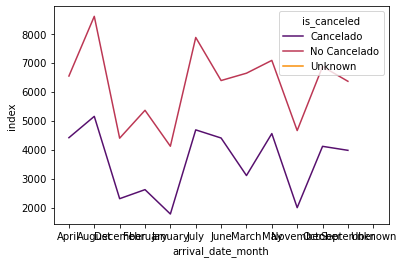

In [29]:
sns.lineplot(x= 'arrival_date_month', y='index', hue='is_canceled', data=df_count_cancel, palette="inferno")
#'Distribución cancelaciones por arrival_date_month'

<AxesSubplot:xlabel='arrival_date_year', ylabel='count'>

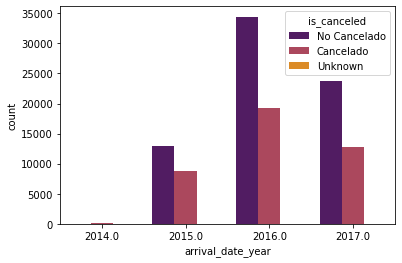

In [30]:
sns.countplot(x='arrival_date_year', hue='is_canceled', data=df, palette='inferno')
#'Distribución cancelaciones por arrival_date_year'

In [31]:
df.columns

Index(['hotel', 'is_canceled', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month', 'adults',
       'children', 'babies', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'agent', 'company',
       'days_in_waiting_list', 'customer_type', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status', 'change_room', 'adr',
       'lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
       'total_nights'],
      dtype='object')

<AxesSubplot:xlabel='country', ylabel='count'>

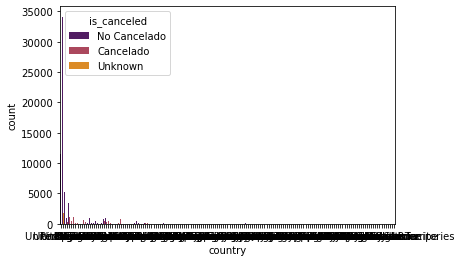

In [32]:
sns.countplot(x='country', hue='is_canceled', data=df, palette='inferno')
#'Distribución cancelaciones por país

In [33]:
df_paises = df_id.groupby(['country', 'is_canceled']).count()

In [34]:
df_paises.reset_index(inplace=True)

In [35]:
df_paises

,country,is_canceled,index,hotel,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,adults,children,babies,meal,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,company,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,reservation_status,change_room,adr,lead_time,stays_in_weekend_nights,stays_in_week_nights,total_nights
0,Albania,Cancelado,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,Albania,No Cancelado,4,4,4,4,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
2,Algeria,Cancelado,13,13,13,13,10,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13
3,Algeria,No Cancelado,42,42,37,42,34,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42
4,American Samoa,No Cancelado,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,Vietnam,Cancelado,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
264,Vietnam,No Cancelado,5,5,5,5,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
265,Zambia,No Cancelado,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
266,Zimbabwe,Cancelado,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [36]:
type(df_paises)

pandas.core.frame.DataFrame

In [37]:
df_paises.sort_values(by='index', ascending=False).iloc[:10]

,country,is_canceled,index,hotel,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,adults,children,babies,meal,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,company,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,reservation_status,change_room,adr,lead_time,stays_in_weekend_nights,stays_in_week_nights,total_nights
257,Unknown,No Cancelado,34123,34123,32501,34123,28846,34082,34123,34123,34123,34123,34123,34123,34123,34123,34123,34123,34123,34123,34123,34123,34123,34123,34123,34123,34123,34123,34123,34123,34123,34123,34123
256,Unknown,Cancelado,19631,19631,18630,19631,16568,19612,19631,19631,19631,19631,19631,19631,19631,19631,19631,19631,19631,19631,19631,19631,19631,19631,19631,19631,19631,19631,19631,19631,19631,19631,19631
194,Portugal,Cancelado,14386,14386,13611,14386,12073,14367,14386,14386,14386,14386,14386,14386,14386,14386,14386,14386,14386,14386,14386,14386,14386,14386,14386,14386,14386,14386,14386,14386,14386,14386,14386
195,Portugal,No Cancelado,11517,11517,10907,11517,9722,11503,11517,11517,11517,11517,11517,11517,11517,11517,11517,11517,11517,11517,11517,11517,11517,11517,11517,11517,11517,11517,11517,11517,11517,11517,11517
253,United Kingdom,No Cancelado,5203,5203,4966,5203,4420,5197,5203,5203,5203,5203,5203,5203,5203,5203,5203,5203,5203,5203,5203,5203,5203,5203,5203,5203,5203,5203,5203,5203,5203,5203,5203
83,France,No Cancelado,4675,4675,4429,4675,3987,4673,4675,4675,4675,4675,4675,4675,4675,4675,4675,4675,4675,4675,4675,4675,4675,4675,4675,4675,4675,4675,4675,4675,4675,4675,4675
225,Spain,No Cancelado,3505,3505,3315,3505,2992,3501,3505,3505,3505,3505,3505,3505,3505,3505,3505,3505,3505,3505,3505,3505,3505,3505,3505,3505,3505,3505,3505,3505,3505,3505,3505
90,Germany,No Cancelado,3284,3284,3122,3284,2768,3282,3284,3284,3284,3284,3284,3284,3284,3284,3284,3284,3284,3284,3284,3284,3284,3284,3284,3284,3284,3284,3284,3284,3284,3284,3284
258,Unknown,Unknown,1831,1831,0,1831,0,0,1831,1831,1831,1831,1831,1831,1831,1831,1831,1831,1831,1831,1831,1831,1831,1831,1831,1831,1831,1831,1831,1831,1831,1831,1831
252,United Kingdom,Cancelado,1367,1367,1301,1367,1156,1367,1367,1367,1367,1367,1367,1367,1367,1367,1367,1367,1367,1367,1367,1367,1367,1367,1367,1367,1367,1367,1367,1367,1367,1367,1367


In [38]:
df_paises.iloc[:10].sort_values(by='index', inplace=True, ascending=False)

/home/karvala/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [39]:
df_paises

,country,is_canceled,index,hotel,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,adults,children,babies,meal,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,company,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,reservation_status,change_room,adr,lead_time,stays_in_weekend_nights,stays_in_week_nights,total_nights
0,Albania,Cancelado,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,Albania,No Cancelado,4,4,4,4,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
2,Algeria,Cancelado,13,13,13,13,10,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13
3,Algeria,No Cancelado,42,42,37,42,34,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42
4,American Samoa,No Cancelado,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,Vietnam,Cancelado,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
264,Vietnam,No Cancelado,5,5,5,5,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
265,Zambia,No Cancelado,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
266,Zimbabwe,Cancelado,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [40]:
df_paises_10 = df_paises.iloc[:10]

In [41]:
df_paises_10

,country,is_canceled,index,hotel,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,adults,children,babies,meal,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,company,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,reservation_status,change_room,adr,lead_time,stays_in_weekend_nights,stays_in_week_nights,total_nights
0,Albania,Cancelado,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,Albania,No Cancelado,4,4,4,4,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
2,Algeria,Cancelado,13,13,13,13,10,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13
3,Algeria,No Cancelado,42,42,37,42,34,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42
4,American Samoa,No Cancelado,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,Andorra,Cancelado,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
6,Angola,Cancelado,110,110,103,110,88,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110
7,Angola,No Cancelado,84,84,79,84,72,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84
8,Anguilla,No Cancelado,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
9,Argentina,Cancelado,25,25,22,25,22,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25


<AxesSubplot:xlabel='country', ylabel='index'>

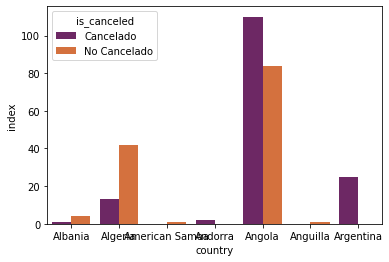

In [42]:
sns.barplot(x='country', y='index', hue='is_canceled', data=df_paises_10, palette='inferno')

In [43]:
df_paises is None

False

In [44]:
df_cancelados.reset_index(inplace=True)

In [45]:
df_paises_cancel = df_paises[df_paises['is_canceled'] == 'Cancelado'][['country', 'index']]
df_paises_not_cancel = df_paises[df_paises['is_canceled'] == 'No Cancelado'][['country', 'index']]

In [46]:
dict_cancel = {'index' : 'num_cancelados'}  
dict_not_cancel = {'index' : 'num_no_cancelados'}  


In [47]:
df_paises_cancel.rename(columns=dict_cancel, inplace=True)
df_paises_not_cancel.rename(columns=dict_not_cancel, inplace=True)

In [48]:
df_contar = df_paises_cancel.merge(df_paises_not_cancel, how='inner', on='country')

In [49]:
df_contar.columns

Index(['country', 'num_cancelados', 'num_no_cancelados'], dtype='object')

In [50]:
df_contar['tasa_cancelacion'] = round((df_contar['num_cancelados']/(df_contar['num_no_cancelados']+df_contar['num_cancelados']))*100, 2)


In [51]:
df_contar.sort_values(by='tasa_cancelacion', inplace=True, ascending=False)
df_contar

,country,num_cancelados,num_no_cancelados,tasa_cancelacion
9,Bangladesh,7,1,87.50
39,Hong Kong,12,2,85.71
91,Tajikistan,6,1,85.71
43,Indonesia,17,3,85.00
96,United Arab Emirates,23,5,82.14
...,...,...,...,...
75,Puerto Rico,1,10,9.09
60,Mexico,4,44,8.33
41,Iceland,2,24,7.69
57,Malaysia,1,19,5.00


In [52]:
df_contar['total_reservas'] = df_contar['num_no_cancelados']+df_contar['num_cancelados']

In [53]:
df_contar.to_csv('../data/tasa_pais.csv')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Bangladesh'),
  Text(1, 0, 'Hong Kong'),
  Text(2, 0, 'Tajikistan'),
  Text(3, 0, 'Indonesia'),
  Text(4, 0, 'United Arab Emirates'),
  Text(5, 0, 'Pakistan'),
  Text(6, 0, 'Senegal'),
  Text(7, 0, 'Maldives'),
  Text(8, 0, 'Bahrain'),
  Text(9, 0, 'Qatar'),
  Text(10, 0, 'Saudi Arabia'),
  Text(11, 0, 'Nigeria'),
  Text(12, 0, 'Georgia'),
  Text(13, 0, 'Faroe Islands'),
  Text(14, 0, 'Dominican Republic'),
  Text(15, 0, 'Azerbaijan'),
  Text(16, 0, 'Cape Verde'),
  Text(17, 0, 'Angola'),
  Text(18, 0, 'Portugal'),
  Text(19, 0, 'Tunisia')])

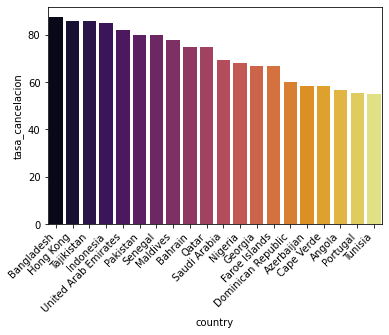

In [54]:
sns.barplot(x='country', y='tasa_cancelacion', data=df_contar[:20], palette='inferno')
plt.xticks(rotation=45, ha='right')

In [55]:
df.columns

Index(['hotel', 'is_canceled', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month', 'adults',
       'children', 'babies', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'agent', 'company',
       'days_in_waiting_list', 'customer_type', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status', 'change_room', 'adr',
       'lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
       'total_nights'],
      dtype='object')

In [56]:
df_room = df[['is_canceled', 'reserved_room_type', 'assigned_room_type', 'change_room']]

In [57]:
df['change_room'] = np.where(df['reserved_room_type']== df['assigned_room_type'], 'equal', 'change')

In [58]:
# df_room.reset_index(inplace=True)
df_room_group = df_room.groupby(['assigned_room_type', 'is_canceled']).count()
df_room_group.reset_index(inplace=True)

In [59]:
df_room_group

,assigned_room_type,is_canceled,reserved_room_type,change_room
0,A,Cancelado,31864,31864
1,A,No Cancelado,40852,40852
2,B,Cancelado,512,512
3,B,No Cancelado,1650,1650
4,C,Cancelado,446,446
5,C,No Cancelado,1928,1928
6,D,Cancelado,6347,6347
7,D,No Cancelado,18933,18933
8,E,Cancelado,1965,1965
9,E,No Cancelado,5838,5838


<AxesSubplot:xlabel='assigned_room_type', ylabel='reserved_room_type'>

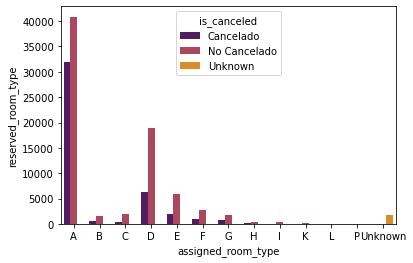

In [66]:
sns.barplot(x='assigned_room_type', y='reserved_room_type', hue='is_canceled', data=df_room_group, palette='inferno')


In [73]:
df_room_change = df_room.groupby(['change_room','is_canceled']).count()
df_room_change.reset_index(inplace=True)

In [74]:
df_room_change

,change_room,is_canceled,reserved_room_type,assigned_room_type
0,change,Cancelado,15076,15076
1,change,No Cancelado,34781,34781
2,change,Unknown,1831,1831
3,equal,Cancelado,28046,28046
4,equal,No Cancelado,40102,40102


<AxesSubplot:xlabel='change_room', ylabel='reserved_room_type'>

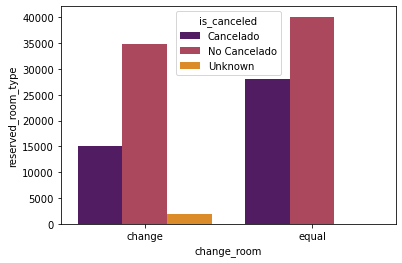

In [75]:
sns.barplot(x='change_room', y='reserved_room_type', hue='is_canceled', data=df_room_change, palette='inferno')


In [87]:
df_id

,index,hotel,is_canceled,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,company,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,reservation_status,change_room,adr,lead_time,stays_in_weekend_nights,stays_in_week_nights,total_nights
0,0,Resort Hotel,No Cancelado,2015.0,July,27.0,1.0,2,0,0,BB,Portugal,Unknown,Direct,First time,0,0,C,C,3,Unknown,Unknown,0,Transient,0,0,Check-Out,equal,0.000,342,0,0,0
1,1,Resort Hotel,No Cancelado,2015.0,July,27.0,1.0,2,0,0,BB,Unknown,Unknown,Direct,First time,0,0,Unknown,C,4,Unknown,Unknown,0,Transient,0,0,Check-Out,change,0.000,737,0,0,0
2,2,Resort Hotel,No Cancelado,2015.0,July,27.0,1.0,1,0,0,BB,United Kingdom,Unknown,Direct,First time,0,0,A,C,0,Unknown,Unknown,0,Transient,0,0,Check-Out,change,75.000,7,0,1,1
3,3,Resort Hotel,No Cancelado,2015.0,July,27.0,1.0,1,0,0,BB,United Kingdom,Corporate,Corporate,First time,0,0,A,A,0,304.0,Unknown,0,Transient,0,0,Check-Out,equal,75.000,13,0,1,1
4,4,Resort Hotel,No Cancelado,2015.0,July,NaN,1.0,2,0,0,BB,Unknown,Online TA,TA/TO,First time,0,0,A,A,0,240.0,Unknown,0,Transient,0,1,Check-Out,equal,98.000,14,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119831,182872,Unknown,Unknown,NaN,Unknown,NaN,NaN,2,0,0,Unknown,Unknown,Unknown,Unknown,First time,0,0,Unknown,Unknown,0,Unknown,Unknown,0,Unknown,0,0,Unknown,change,93.054,224,19,19,38
119832,182873,Unknown,Unknown,NaN,Unknown,NaN,NaN,2,0,0,Unknown,Unknown,Unknown,Unknown,First time,0,0,Unknown,Unknown,0,Unknown,Unknown,0,Unknown,0,0,Unknown,change,62.622,390,14,19,33
119833,182874,Unknown,Unknown,NaN,Unknown,NaN,NaN,2,0,0,Unknown,Unknown,Unknown,Unknown,First time,0,0,Unknown,Unknown,0,Unknown,Unknown,0,Unknown,0,0,Unknown,change,91.604,230,11,20,31
119834,182875,Unknown,Unknown,NaN,Unknown,NaN,NaN,2,0,0,Unknown,Unknown,Unknown,Unknown,First time,0,0,Unknown,Unknown,0,Unknown,Unknown,0,Unknown,0,0,Unknown,change,135.770,304,16,15,31


In [88]:
df_fecha = df_id[['index', 'arrival_date_day_of_month', 'arrival_date_month','arrival_date_year']]

In [95]:
def to_int(num):
    try:
        return int(num)
    except:
        return num

In [93]:
df_fecha = df_fecha.dropna()
df_fecha

,index,arrival_date_day_of_month,arrival_date_month,arrival_date_year
0,0,1.0,July,2015.0
1,1,1.0,July,2015.0
2,2,1.0,July,2015.0
3,3,1.0,July,2015.0
4,4,1.0,July,2015.0
...,...,...,...,...
118000,119385,30.0,August,2017.0
118001,119386,31.0,August,2017.0
118002,119387,31.0,August,2017.0
118003,119388,31.0,August,2017.0


In [99]:
df_fecha[['arrival_date_day_of_month', 'arrival_date_year']] = df_fecha[['arrival_date_day_of_month', 'arrival_date_year']].apply(to_int).astype(int)
df_fecha

,index,arrival_date_day_of_month,arrival_date_month,arrival_date_year
0,0,1,July,2015
1,1,1,July,2015
2,2,1,July,2015
3,3,1,July,2015
4,4,1,July,2015
...,...,...,...,...
118000,119385,30,August,2017
118001,119386,31,August,2017
118002,119387,31,August,2017
118003,119388,31,August,2017


In [100]:
df_fecha['arrival_date_month'].unique()

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [101]:
dict_month = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}

In [102]:
df_fecha['num_month'] = df_fecha['arrival_date_month'].map(dict_month)

In [103]:
df_fecha

,index,arrival_date_day_of_month,arrival_date_month,arrival_date_year,num_month
0,0,1,July,2015,7
1,1,1,July,2015,7
2,2,1,July,2015,7
3,3,1,July,2015,7
4,4,1,July,2015,7
...,...,...,...,...,...
118000,119385,30,August,2017,8
118001,119386,31,August,2017,8
118002,119387,31,August,2017,8
118003,119388,31,August,2017,8


In [108]:
df_fecha['fecha']=df_fecha.apply(lambda x:'%s-%s-%s' % (x['arrival_date_day_of_month'],x['num_month'], x['arrival_date_year']),axis=1)
df_fecha

,index,arrival_date_day_of_month,arrival_date_month,arrival_date_year,num_month,fecha
0,0,1,July,2015,7,1-7-2015
1,1,1,July,2015,7,1-7-2015
2,2,1,July,2015,7,1-7-2015
3,3,1,July,2015,7,1-7-2015
4,4,1,July,2015,7,1-7-2015
...,...,...,...,...,...,...
118000,119385,30,August,2017,8,30-8-2017
118001,119386,31,August,2017,8,31-8-2017
118002,119387,31,August,2017,8,31-8-2017
118003,119388,31,August,2017,8,31-8-2017


In [109]:
df = df_id.merge(df_fecha, how='left', on='index')


,index,hotel,is_canceled,arrival_date_year_x,arrival_date_month_x,arrival_date_week_number,arrival_date_day_of_month_x,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,company,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,reservation_status,change_room,adr,lead_time,stays_in_weekend_nights,stays_in_week_nights,total_nights,arrival_date_day_of_month_y,arrival_date_month_y,arrival_date_year_y,num_month,fecha
0,0,Resort Hotel,No Cancelado,2015.0,July,27.0,1.0,2,0,0,BB,Portugal,Unknown,Direct,First time,0,0,C,C,3,Unknown,Unknown,0,Transient,0,0,Check-Out,equal,0.000,342,0,0,0,1.0,July,2015.0,7.0,1-7-2015
1,1,Resort Hotel,No Cancelado,2015.0,July,27.0,1.0,2,0,0,BB,Unknown,Unknown,Direct,First time,0,0,Unknown,C,4,Unknown,Unknown,0,Transient,0,0,Check-Out,change,0.000,737,0,0,0,1.0,July,2015.0,7.0,1-7-2015
2,2,Resort Hotel,No Cancelado,2015.0,July,27.0,1.0,1,0,0,BB,United Kingdom,Unknown,Direct,First time,0,0,A,C,0,Unknown,Unknown,0,Transient,0,0,Check-Out,change,75.000,7,0,1,1,1.0,July,2015.0,7.0,1-7-2015
3,3,Resort Hotel,No Cancelado,2015.0,July,27.0,1.0,1,0,0,BB,United Kingdom,Corporate,Corporate,First time,0,0,A,A,0,304.0,Unknown,0,Transient,0,0,Check-Out,equal,75.000,13,0,1,1,1.0,July,2015.0,7.0,1-7-2015
4,4,Resort Hotel,No Cancelado,2015.0,July,NaN,1.0,2,0,0,BB,Unknown,Online TA,TA/TO,First time,0,0,A,A,0,240.0,Unknown,0,Transient,0,1,Check-Out,equal,98.000,14,0,2,2,1.0,July,2015.0,7.0,1-7-2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119831,182872,Unknown,Unknown,NaN,Unknown,NaN,NaN,2,0,0,Unknown,Unknown,Unknown,Unknown,First time,0,0,Unknown,Unknown,0,Unknown,Unknown,0,Unknown,0,0,Unknown,change,93.054,224,19,19,38,NaN,NaN,NaN,NaN,NaN
119832,182873,Unknown,Unknown,NaN,Unknown,NaN,NaN,2,0,0,Unknown,Unknown,Unknown,Unknown,First time,0,0,Unknown,Unknown,0,Unknown,Unknown,0,Unknown,0,0,Unknown,change,62.622,390,14,19,33,NaN,NaN,NaN,NaN,NaN
119833,182874,Unknown,Unknown,NaN,Unknown,NaN,NaN,2,0,0,Unknown,Unknown,Unknown,Unknown,First time,0,0,Unknown,Unknown,0,Unknown,Unknown,0,Unknown,0,0,Unknown,change,91.604,230,11,20,31,NaN,NaN,NaN,NaN,NaN
119834,182875,Unknown,Unknown,NaN,Unknown,NaN,NaN,2,0,0,Unknown,Unknown,Unknown,Unknown,First time,0,0,Unknown,Unknown,0,Unknown,Unknown,0,Unknown,0,0,Unknown,change,135.770,304,16,15,31,NaN,NaN,NaN,NaN,NaN


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119836 entries, 0 to 119835
Data columns (total 38 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   index                           119836 non-null  int64  
 1   hotel                           119836 non-null  object 
 2   is_canceled                     119836 non-null  object 
 3   arrival_date_year_x             112076 non-null  float64
 4   arrival_date_month_x            119836 non-null  object 
 5   arrival_date_week_number        99667 non-null   float64
 6   arrival_date_day_of_month_x     117886 non-null  float64
 7   adults                          119836 non-null  int64  
 8   children                        119836 non-null  int64  
 9   babies                          119836 non-null  int64  
 10  meal                            119836 non-null  object 
 11  country                         119836 non-null  object 
 12  market_segment  

In [114]:
df.to_csv('../data/bookings.csv')

In [106]:
pd.concat[df_fecha]('arrival_date_day_of_month','-','num_month','-','arrival_date_year') 

TypeError: 'function' object is not subscriptable

In [104]:
df_fecha['fecha'] = df_fecha.concat('arrival_date_day_of_month','-','num_month','-','arrival_date_year') 

AttributeError: 'DataFrame' object has no attribute 'concat'

In [ ]:
df_fecha

In [76]:
df.columns

Index(['hotel', 'is_canceled', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month', 'adults',
       'children', 'babies', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'agent', 'company',
       'days_in_waiting_list', 'customer_type', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status', 'change_room', 'adr',
       'lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
       'total_nights'],
      dtype='object')